# Homework 3: Hunt Shifting Numbers

### Sources
    
    https://medium.com/the-data-science-publication/how-to-augment-the-mnist-dataset-using-tensorflow-4fbf113e99a0

### Import TensorFlow

In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tfc
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import cv2
from random import randint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

###### Define methods

In [2]:
def evaluate(testGenerator, testModel):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = testModel.evaluate(testGenerator, verbose=2) 
    print("ACCURACY: " + str(test_acc))
    
def displaySamplesFromDataSet(xDataSet, yDataset):
    # define number of images to show
    num_row = 2
    num_col = 8
    num= num_row*num_col
    
    # get images
    images = xDataSet[0:num]
    labels = yDataset[0:num]
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes[i//num_col, i%num_col]
         ax.imshow(images[i], cmap='gray_r')
         ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    plt.show()

def resizeAndShift(width_shift_val, height_shift_val, xDataSet, yDataset, label):
    datagen = ImageDataGenerator(width_shift_range=width_shift_val, height_shift_range=height_shift_val)
    
    new_shape = (56,56)
    returnDataSet = np.zeros(shape=(xDataSet.shape[0],)+new_shape)
    for idx in range(xDataSet.shape[0]):
        returnDataSet[idx][14: 14 + 28, 14: 14 + 28] = xDataSet[idx]

    # define number of rows & columns
    num_row = 2
    num_col = 8
    num= num_row*num_col

    # plot before
    print(label + ' BEFORE:\n')
    fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes1[i//num_col, i%num_col]
         ax.imshow(returnDataSet[i], cmap='gray_r')
         ax.set_title('Label: {}'.format(yDataset[i]))
    plt.tight_layout()
    plt.show()

    # plot after
    print(label + ' AFTER:\n')
    fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    generator = datagen.flow(returnDataSet.reshape(returnDataSet.shape[0], 56, 56, 1),yDataset.reshape(yDataset.shape[0], 1),batch_size=num,shuffle=False) 
    for X, Y in generator:
         for i in range(0, num):
              ax = axes2[i//num_col, i%num_col]
              ax.imshow(X[i].reshape(56,56), cmap='gray_r')
              ax.set_title('Label: {}'.format(int(Y[i])))
         break
    plt.tight_layout()
    plt.show()
    return generator

def augment(rotationAngleRange, zoomRange, shiftx, shifty, xDataSet, yDataset, label):
    datagen = ImageDataGenerator(rotation_range=rotationAngleRange,zoom_range=zoomRange,
                                width_shift_range=shiftx, height_shift_range=shifty)

    # define number of rows & columns
    num_row = 2
    num_col = 8
    num= num_row*num_col

    # plot before
    print(label + ' BEFORE:\n')
    fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes1[i//num_col, i%num_col]
         ax.imshow(xDataSet[i], cmap='gray_r')
         ax.set_title('Label: {}'.format(yDataset[i]))
    plt.tight_layout()
    plt.show()

    # plot after
    print(label + ' AFTER:\n')
    fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for X, Y in datagen.flow(xDataSet.reshape(xDataSet.shape[0], 28, 28, 1),yDataset.reshape(yDataset.shape[0], 1),batch_size=num,shuffle=False):
         for i in range(0, num):
              ax = axes2[i//num_col, i%num_col]
              ax.imshow(X[i].reshape(28,28), cmap='gray_r')
              ax.set_title('Label: {}'.format(int(Y[i])))
         break
    plt.tight_layout()
    plt.show()
    return xDataSet

def resizeAndShiftHorizontal(width_shift_val, xDataSet, yDataset, label):
    datagen = ImageDataGenerator(width_shift_range=width_shift_val, height_shift_range=0)
    
    new_shape = (56,56)
    returnDataSet = np.zeros(shape=(xDataSet.shape[0],)+new_shape)
    for idx in range(xDataSet.shape[0]):
        yStart = 28
        yEnd = 56
        if label == 'TRAIN':
            yStart = 0
            yEnd = 28
                
        returnDataSet[idx][ yStart:yEnd, 14: 14 + 28] = xDataSet[idx]

    # define number of rows & columns
    num_row = 2
    num_col = 8
    num= num_row*num_col

    # plot before
    print(label + ' BEFORE:\n')
    fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes1[i//num_col, i%num_col]
         ax.imshow(returnDataSet[i], cmap='gray_r')
         ax.set_title('Label: {}'.format(yDataset[i]))
    plt.tight_layout()
    plt.show()

    # plot after
    print(label + ' AFTER:\n')
    fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for X, Y in datagen.flow(returnDataSet.reshape(returnDataSet.shape[0], 56, 56, 1),yDataset.reshape(yDataset.shape[0], 1),batch_size=num,shuffle=False):
         for i in range(0, num):
              ax = axes2[i//num_col, i%num_col]
              ax.imshow(X[i].reshape(56,56), cmap='gray_r')
              ax.set_title('Label: {}'.format(int(Y[i])))
         break
    plt.tight_layout()
    plt.show()
    return returnDataSet

### Task 1


###### Load MNIST data

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255
test_images = test_images / 255

##### Builidng a Training Pipeline - Task 1

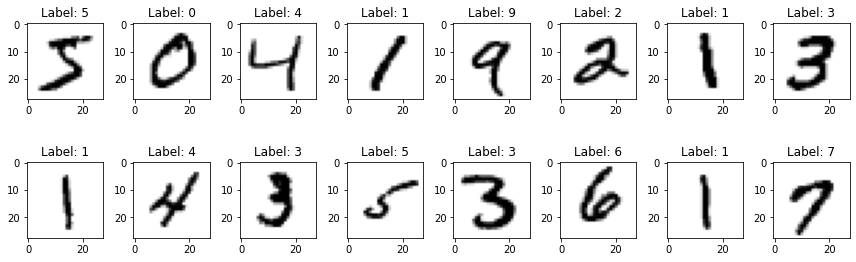

In [4]:
displaySamplesFromDataSet(train_images, train_labels)
train_images = train_images.reshape(-1, 28, 28, 1)

##### Building a Evaluation Pipeline - Task 1

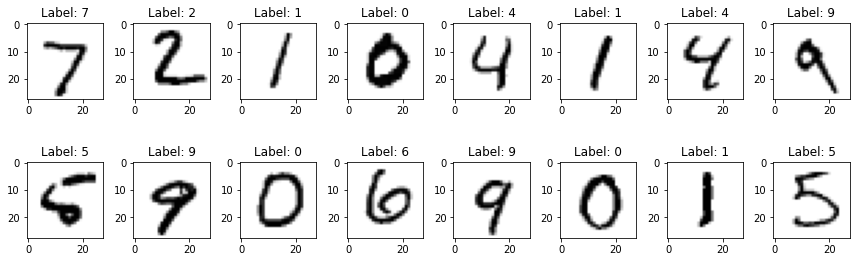

In [5]:
displaySamplesFromDataSet(test_images, test_labels)
test_images = test_images.reshape(-1, 28, 28, 1)

##### Create and train the model - Task 1

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1485 - accuracy: 0.9542 - val_loss: 0.0452 - val_accuracy: 0.9856
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0464 - accuracy: 0.9853 - val_loss: 0.0358 - val_accuracy: 0.9885
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0342 - accuracy: 0.9891 - val_loss: 0.0348 - val_accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0263 - accuracy: 0.9916 - val_loss: 0.0265 - val_accuracy: 0.9911
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0330 - val_accuracy: 0.9916


##### Evaluate the model - Task 1

In [7]:
#evaluate(test_images, test_labels, model) CREATE OVERLOAD

### Task 2


###### Load MNIST data

In [8]:
from tensorflow.keras.datasets import mnist
(train_images_2, train_labels_2), (test_images_2, test_labels_2) = mnist.load_data()

In [9]:
train_images_2 = train_images_2 / 255
test_images_2 = test_images_2 / 255

##### Builidng a Training Pipeline - Task 2

TRAIN BEFORE:



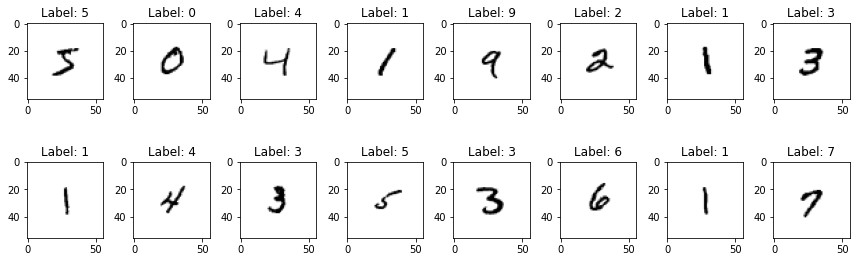

TRAIN AFTER:



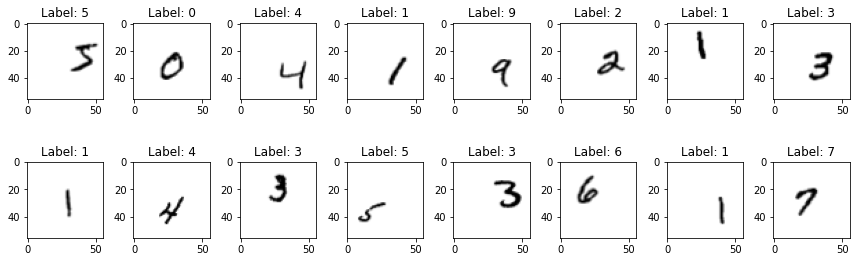

In [10]:
train_generator_2 = resizeAndShift(0.25, 0.25, train_images_2, train_labels_2, "TRAIN")
#ds_train_2 = ds_train_2.reshape(-1, 56, 56, 1)

##### Building a Evaluation Pipeline - Task 2

TEST BEFORE:



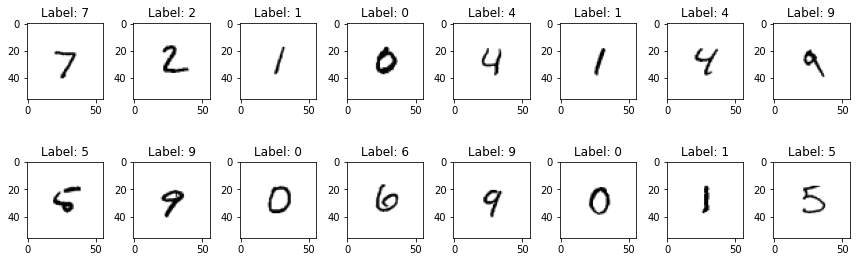

TEST AFTER:



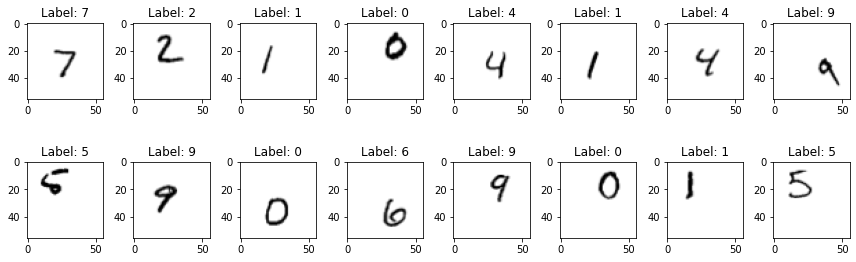

In [11]:
test_generator_2 = resizeAndShift(0.25, 0.25, test_images_2, test_labels_2, "TEST")
#ds_test_2 = ds_test_2.reshape(-1, 56, 56, 1)

##### Create and train the model - Task 2

In [15]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(10))

model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_2.fit_generator(train_generator_2,validation_data=(test_generator_2),epochs = 5) #cleanup other tasks to use these generators

Epoch 1/5
3750/3750 [==============================] - 18s 5ms/step - loss: 0.3617 - accuracy: 0.1026 - val_loss: 0.1080 - val_accuracy: 0.1001
Epoch 2/5
3750/3750 [==============================] - 18s 5ms/step - loss: 0.1030 - accuracy: 0.0987 - val_loss: 0.0875 - val_accuracy: 0.1038
Epoch 3/5
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0742 - accuracy: 0.0986 - val_loss: 0.0661 - val_accuracy: 0.1021
Epoch 4/5
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0614 - accuracy: 0.0991 - val_loss: 0.0517 - val_accuracy: 0.0968
Epoch 5/5
3750/3750 [==============================] - 17s 5ms/step - loss: 0.0530 - accuracy: 0.0987 - val_loss: 0.0608 - val_accuracy: 0.0966


##### Evaluate the model - Task 2

625/625 - 2s - loss: 0.0618 - accuracy: 0.0975
ACCURACY: 0.09749999642372131


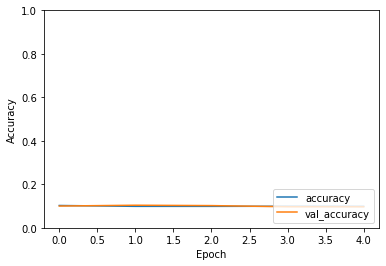

In [16]:
evaluate(test_generator_2, model_2)

### Task 3


###### Load MNIST data

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images_3, train_labels_3), (test_images_3, test_labels_3) = mnist.load_data()

train_images_3 = train_images_3 / 255
test_images_3 = test_images_3 / 255

##### Builidng a Training Pipeline - Task 3

In [ ]:
ds_train_3 = resizeAndShiftHorizontal(0.25, train_images_3, train_labels_3, "TRAIN")
ds_train_3 = ds_train_3.reshape(-1, 56, 56, 1)

##### Building a Evaluation Pipeline - Task 3

In [ ]:
ds_test_3 = resizeAndShiftHorizontal(0.25, test_images_3, test_labels_3, "TEST")
ds_test_3 = ds_test_3.reshape(-1, 56, 56, 1)

##### Create and train the model - Task 3

In [ ]:
model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 1)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.Flatten())
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(10))

model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_3.fit(ds_train_3, train_labels_3, epochs=5, 
                    validation_data=(ds_test_3, test_labels_3))

##### Evaluate the model - Task 3

In [ ]:
evaluate(ds_test_3, test_labels_3, model_3)

### Task 1 - Augementation

###### Load MNIST data

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images_1a, train_labels_1a), (test_images_1a, test_labels_1a) = mnist.load_data()

train_images_1a = train_images_1a / 255
test_images_1a = test_images_1a / 255

##### Builidng a Training Pipeline - Task 1 Augementation

In [ ]:
ds_train_1a = augment(100, [0.5,2], 0.25, 0.25, train_images, train_labels, "TRAIN")
ds_train_1a = ds_train_1a.reshape(-1, 28, 28, 1)

##### Building a Evaluation Pipeline - Task 1 Augementation

In [ ]:
displaySamplesFromDataSet(test_images_1a, test_labels_1a)
test_images_1a = test_images_1a.reshape(-1, 28, 28, 1)

##### Create and train the model - Task 1 Augementation

In [ ]:
model_1a = models.Sequential()
model_1a.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_1a.add(layers.MaxPooling2D((2, 2)))
model_1a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1a.add(layers.MaxPooling2D((2, 2)))
model_1a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1a.add(layers.Flatten())
model_1a.add(layers.Dense(64, activation='relu'))
model_1a.add(layers.Dense(10))

model_1a.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_1a.fit(ds_train_1a, train_labels_1a, epochs=5, 
                    validation_data=(test_images_1a, test_labels_1a))

##### Evaluate the model - Task 3

In [ ]:
evaluate(test_images_1a, test_labels_1a, model_1a)